# Shap Study

SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. [Github Link](https://github.com/slundberg/shap).

In [1]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [2]:
from wax_toolbox import Timer
from churnchall.boosters import LgbCookie
m = LgbCookie(debug=False)

In [3]:
dftrain, dftest = m.get_train_valid_set()
X, y = dftrain

Reading train set took 0.552 sec


In [4]:
booster = lgb.Booster(model_file='../results/model_bank/lightgbm_model_07-12h-21m.txt')

In [7]:
from churnchall.boosters import get_df_importance
dfimp = get_df_importance(booster)
dfimp.head(10)

,importance
Volume_annuel,11.080768
ancienneté_client,10.351770
Dep_Moyenne_Salaires_Horaires,7.968063
Prix_Elec_M3,7.662578
Prix_Gaz_M3,7.040037
Nb_propriétaire,4.964129
Evolution_Pop_%,4.623930
Echéance.Mois,4.563758
Nb_Atifs,4.533673
Nb_Logement,4.454987


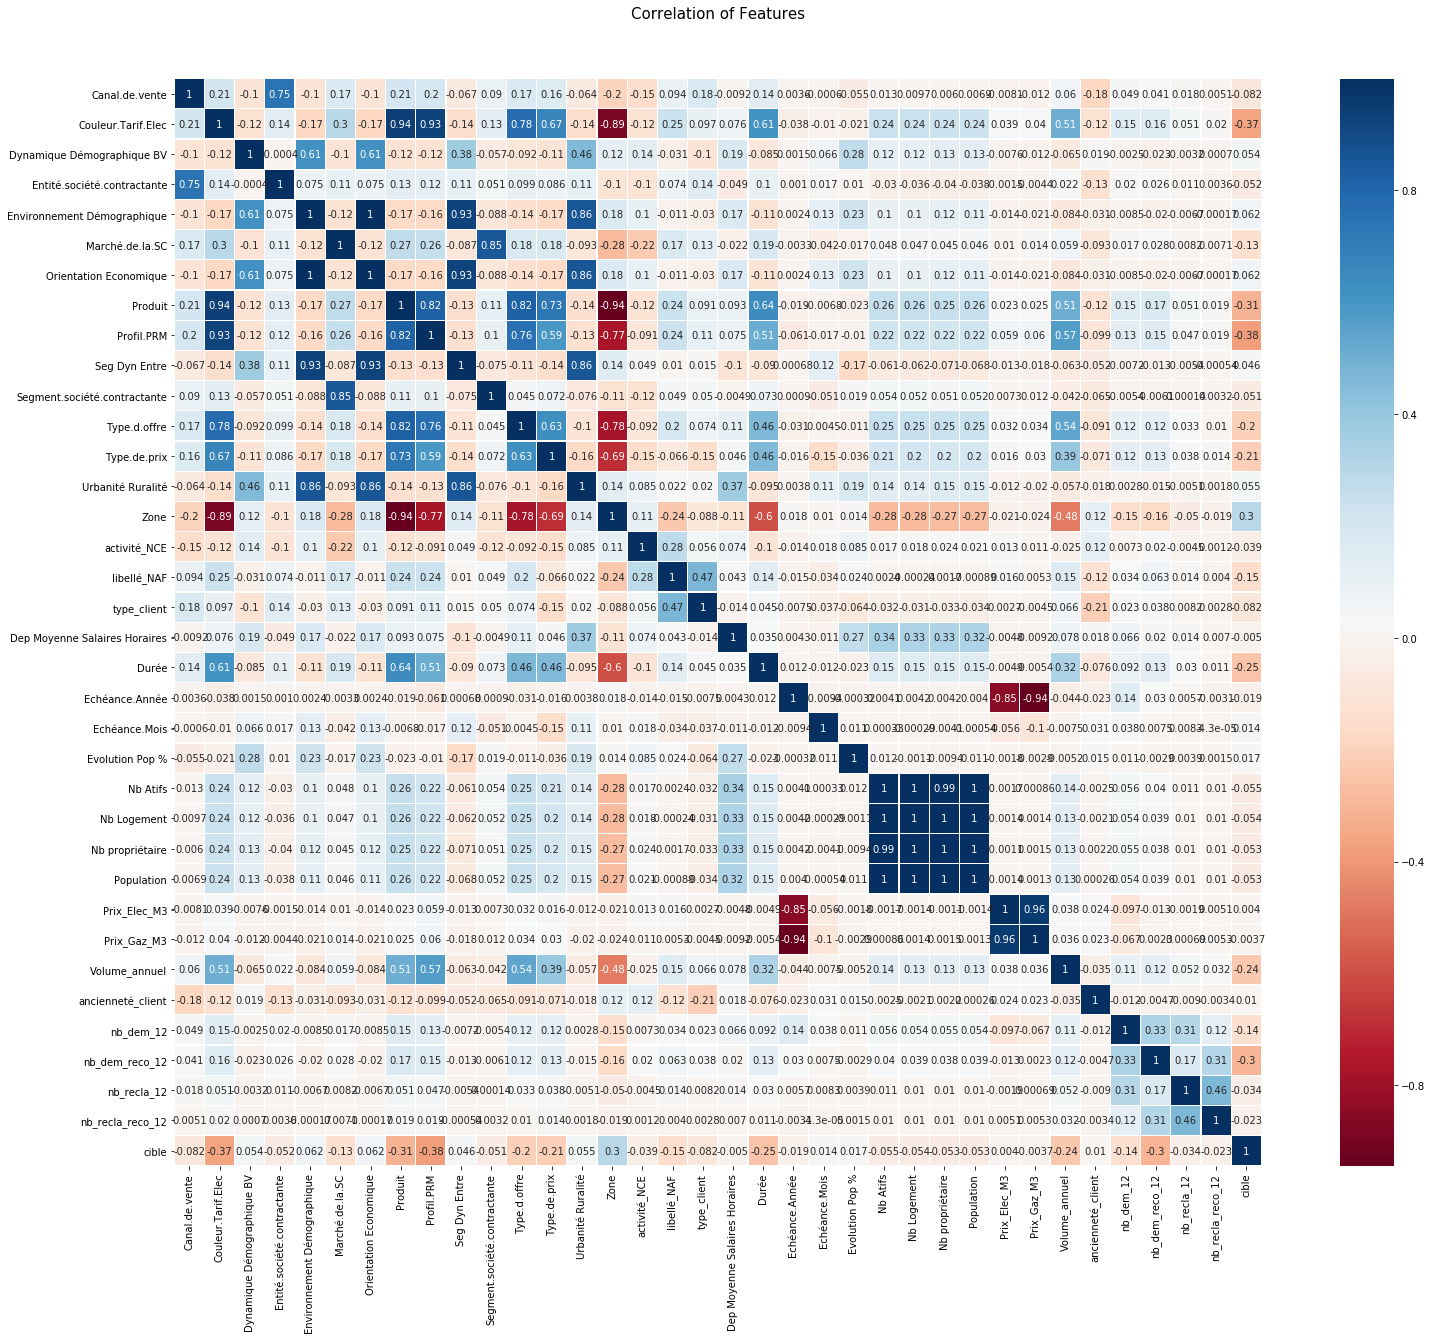

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.concat(dftrain, axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(28,20))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [5]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(booster)

In [6]:
with Timer('Running Shap explainer on X', at_enter=True):
    shap_values = explainer.shap_values(X)

Running Shap explainer on X in progress...
Running Shap explainer on X took 4182.016 sec


In [9]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [11]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[-1,:], X.iloc[-1,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X.sample(n=100))

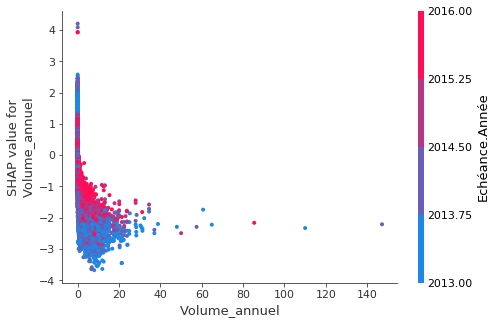

In [16]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Volume_annuel", shap_values, X)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)